In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
HEIGHT = 80
WIDTH = 40

In [3]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-
from __future__ import division, print_function, unicode_literals
import tensorflow as tf
from time import time
from keras.utils import np_utils#one hot
import os
from skimage import data
from skimage import transform
import skimage
import numpy as np

# Download the dataset


def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                  if os.path.isdir(os.path.join(data_directory,d))]
    labels=[]
    images=[]
    for d in directories:
        label_directory = os.path.join(data_directory,d)
        file_names = [os.path.join(label_directory,f)
                     for f in os.listdir(label_directory)
                     if f.endswith('.jpg')]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(str(d))
    return images, labels

Using TensorFlow backend.


In [4]:
ROOT_PATH = '/home/tang/targa/exp4/trainingOriginal/lightTransformation/splitLightData/1SplitDataset/80*40/'
train_data_directory = os.path.join(ROOT_PATH, "train")

In [5]:
train_images,train_labels = load_data(train_data_directory)

In [6]:
TEST_PATH = '/home/tang/targa//exp4/test_real_data/hongxiang_initial_label/'
test_data_directory = os.path.join(TEST_PATH, "test")
test_images,test_labels = load_data(test_data_directory) 

In [7]:
train_images[0].shape

(80, 40, 3)

In [8]:
test_images[0].shape

(80, 40, 3)

In [9]:
#encoding trY teY
from numpy import array
#from numpy import argmax
#from keras.utils import to_categorical
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [10]:
trL,teL=array(train_labels),array(test_labels)
label_encoder = LabelEncoder()

In [11]:
integer_encoded_trL = label_encoder.fit_transform(trL)
integer_encoded_teL = label_encoder.fit_transform(teL)


In [12]:
trainLabels = np_utils.to_categorical(integer_encoded_trL,num_classes = 32)
testLabels = np_utils.to_categorical(integer_encoded_teL,num_classes = 32)

In [13]:
trL.shape

(18169,)

In [14]:
########convert rgb images into black and white
#convert images into size of vector
from skimage.color import rgb2gray





In [15]:
trainImages = rgb2gray(np.array(train_images))
testImages = rgb2gray(np.array(test_images))

train_flat_images = np.reshape(trainImages,(len(trainImages),HEIGHT*WIDTH))
test_flat_images = np.reshape(testImages,(len(testImages),HEIGHT*WIDTH))


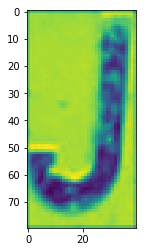

In [16]:
plt.imshow(testImages[1])

In [19]:
batch_size = 10
n_batch = len(trainLabels)//batch_size
lr = tf.Variable(0.001,dtype = tf.float32)

In [20]:

x = tf.placeholder(tf.float32,[None,WIDTH*HEIGHT],name='x-input')
y = tf.placeholder(tf.float32,[None,32],name='y-input')
keep_prob = tf.placeholder(tf.float32,name = 'non-dropout-rate')
W1 = tf.Variable(tf.truncated_normal([WIDTH*HEIGHT,50],stddev=0.1),name='W1')#改成截断正太分布
  
        
b1 = tf.Variable(tf.zeros([50])+0.1,name = 'b1')        
output1 = tf.matmul(x,W1) + b1
L1 = tf.nn.tanh(output1)
L1_drop = tf.nn.dropout(L1,keep_prob)

 

W4 = tf.Variable(tf.truncated_normal([50,32],stddev=0.1))
b4 = tf.Variable(tf.zeros([32])+0.1)
output4 = tf.matmul(L1_drop,W4)+ b4
prediction = tf.nn.softmax(output4)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits = prediction))#联合交叉熵
    
train_step = tf.train.AdamOptimizer(0.00001).minimize(loss)

init = tf.global_variables_initializer()
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))#argmax返回一维张量中的最大值
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
        

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [21]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [22]:
len(testLabels)

63

In [23]:
with tf.Session() as sess:
    sess.run(init)
    #路径和文件名
  
    for epoch in range(2001):#把所有的图片训练20次
        #一批一批的迭代图片，一次迭代100张，一共运行n_batch次
        for batch in range(n_batch):
            #每次传入一百张图片
            batch_xs,batch_ys = next_batch(batch_size,train_flat_images,trainLabels)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys,keep_prob:1.0})
        train_batch_xs,train_batch_ys = train_flat_images,trainLabels
                  
        
            
        test_batch_xs,test_batch_ys = test_flat_images,testLabels
        
        
        test_acc = sess.run(accuracy,feed_dict={x:test_flat_images,y:testLabels,keep_prob:1.0})        
        train_acc = sess.run(accuracy,feed_dict={x:train_flat_images,y:trainLabels,keep_prob:1.0})
      
        if epoch%5 == 0:
            
            print('epoch=' + str(epoch) + ',train accuracy='+ str(train_acc)+',test accuracy=' + str(test_acc))
   

epoch=0,train accuracy=0.31339094,test accuracy=0.11111111
epoch=5,train accuracy=0.5652485,test accuracy=0.20634921
epoch=10,train accuracy=0.7246959,test accuracy=0.25396827
epoch=15,train accuracy=0.7996588,test accuracy=0.23809524
epoch=20,train accuracy=0.83934176,test accuracy=0.22222222
epoch=25,train accuracy=0.85095495,test accuracy=0.3015873
epoch=30,train accuracy=0.85805494,test accuracy=0.31746033
epoch=35,train accuracy=0.86300844,test accuracy=0.31746033
epoch=40,train accuracy=0.86856735,test accuracy=0.34920636
epoch=45,train accuracy=0.87412626,test accuracy=0.36507937
epoch=50,train accuracy=0.8777588,test accuracy=0.3809524
epoch=55,train accuracy=0.8821619,test accuracy=0.34920636
epoch=60,train accuracy=0.88557434,test accuracy=0.34920636
epoch=65,train accuracy=0.8884364,test accuracy=0.34920636
epoch=70,train accuracy=0.89256424,test accuracy=0.36507937
epoch=75,train accuracy=0.8951511,test accuracy=0.36507937
epoch=80,train accuracy=0.8983433,test accuracy=0.3

epoch=690,train accuracy=0.9774341,test accuracy=0.3968254
epoch=695,train accuracy=0.9775442,test accuracy=0.3968254
epoch=700,train accuracy=0.9775992,test accuracy=0.36507937
epoch=705,train accuracy=0.9777093,test accuracy=0.3809524
epoch=710,train accuracy=0.9777643,test accuracy=0.36507937
epoch=715,train accuracy=0.9778194,test accuracy=0.36507937


KeyboardInterrupt: 